In [1]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
my_data = np.genfromtxt('dataset/mat_csv.csv', delimiter=',')
my_data.shape

(48, 264)

In [106]:
np.linspace(1, 2.6, 17)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6])

In [107]:
clusters_num = [i for i in range(10, 50)]
fpcs_vals = {}
m_vals = np.linspace(1, 2.6, 17)
for cluster in clusters_num:
    fpcs_val = []
    for m_val in m_vals:
        cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, cluster, m_val, error = 0.0001, maxiter = 10000)
        #fpcs.append(fpc)
        fpcs_val.append(fpc)
    fpcs_vals[cluster] = fpcs_val
    if(cluster % 3 == 0):
        print(cluster)

12
15
18
21
24
27
30
33
36
39
42
45
48


In [125]:
fpcs_vals[14]

[1.0,
 0.9764180036508494,
 0.8777696375512017,
 0.8019794133575253,
 0.7001293593010971,
 0.5338894866362405,
 0.4927716041058199,
 0.4055824015164029,
 0.3528000576196446,
 0.3137709446599264,
 0.2743894082820673,
 0.2582300015885808,
 0.23773676085047118,
 0.22068431007121014,
 0.2125280494764404,
 0.2041324804062378,
 0.20030211814949794]

In [127]:
np.linspace(0.5, 1.6, 12)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])

In [130]:
m_vals = np.linspace(0.5, 1.6, 12)
fpc_val1 = []
for m_val in m_vals:
    cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, 15, m_val, error = 0.0001, maxiter = 10000)
    #fpcs.append(fpc)
    fpc_val1.append(fpc)

In [131]:
fpc_val1

[0.0941825632594516,
 0.11483446292928791,
 0.1357391441508072,
 0.16002462087395383,
 0.22219400641746298,
 0.96875,
 0.9587923143277294,
 0.9173384639086127,
 0.782660292191768,
 0.7068804498292915,
 0.5741244066536922,
 0.4647551879290406]

In [132]:
m_vals = np.linspace(0.5, 1.6, 12)
fpc_val1 = []
for m_val in m_vals:
    cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, 14, m_val, error = 0.0001, maxiter = 10000)
    #fpcs.append(fpc)
    fpc_val1.append(fpc)

In [133]:
fpc_val1

[0.11128252188634746,
 0.12869200273244782,
 0.1373299948725613,
 0.1407535870795508,
 0.22891772932288978,
 0.9873737373737375,
 0.9575856367986249,
 0.8692811587051104,
 0.7687790318026997,
 0.7274170420245583,
 0.5546448830277014,
 0.4648801400320831]

In [136]:
cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, 15, 1.1, error = 0.0001, maxiter = 10000)

In [138]:
#take top 3 clusters that each prog belongs to

In [139]:
u.shape

(15, 264)

In [142]:
u[np.argsort(u[:, 0])[-3:], 0]

array([8.27247791e-09, 1.11875612e-08, 9.99999981e-01])

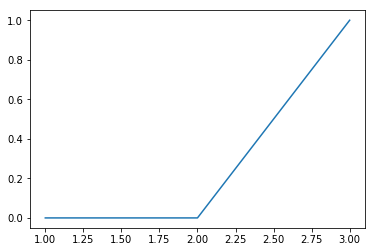

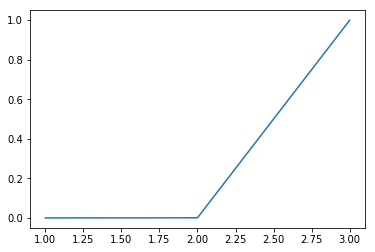

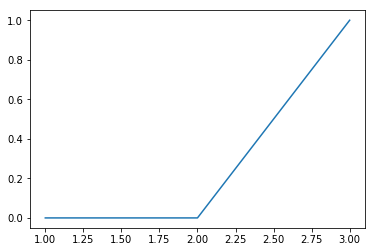

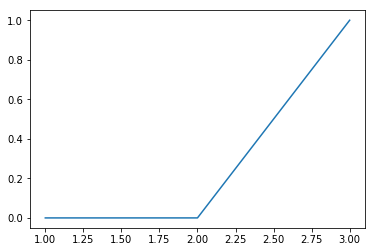

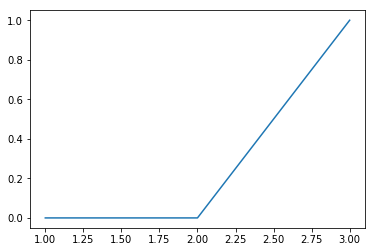

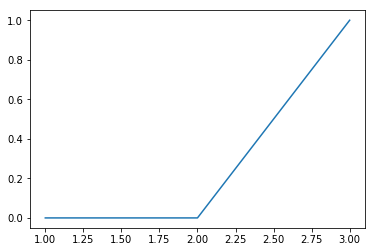

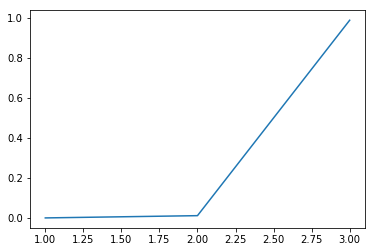

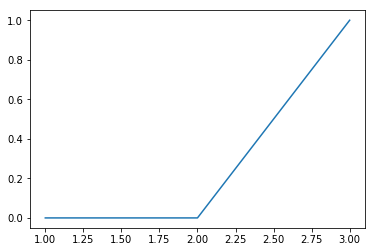

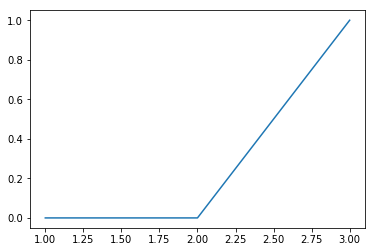

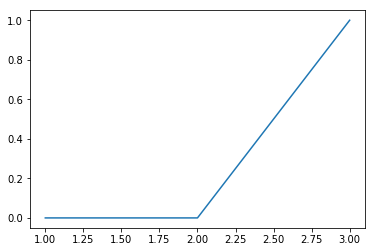

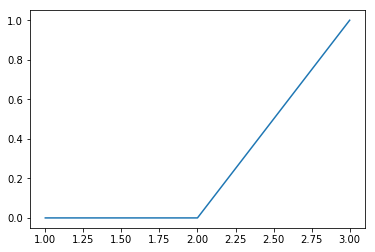

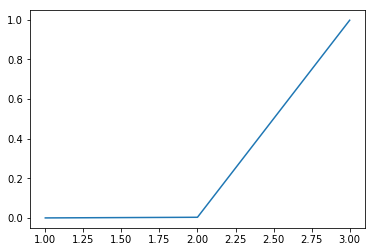

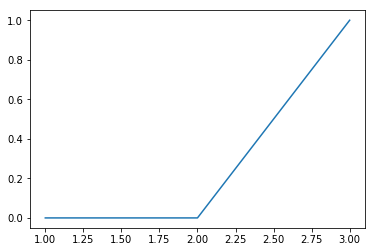

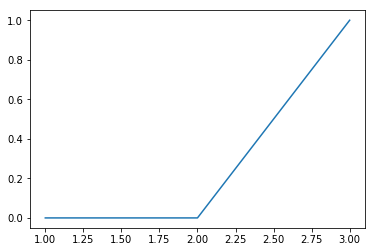

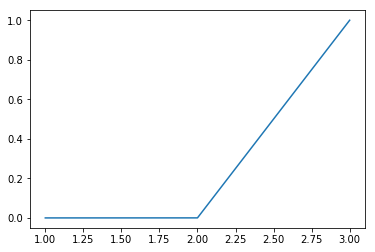

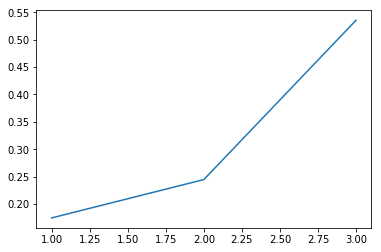

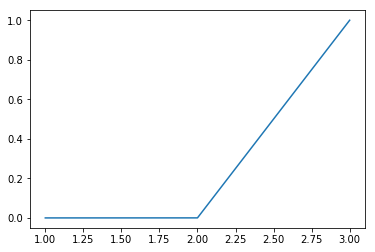

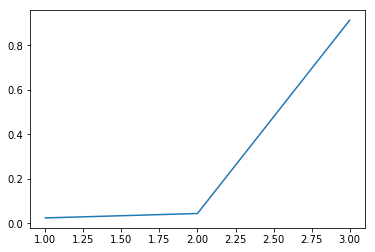

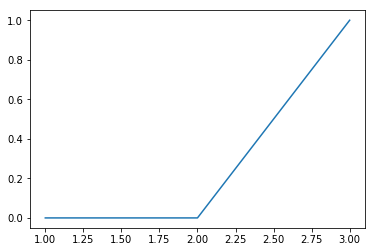

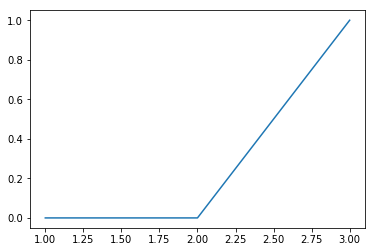

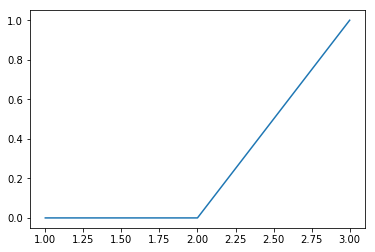

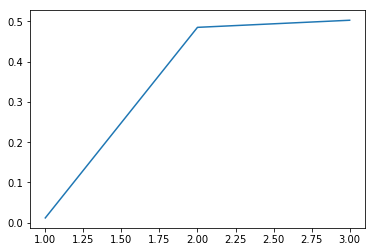

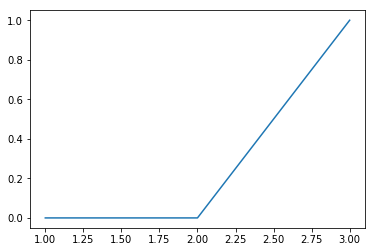

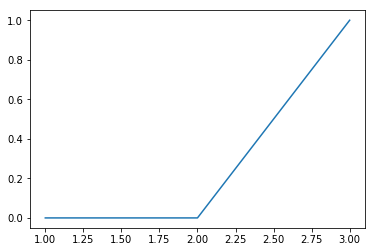

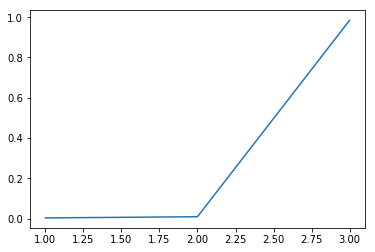

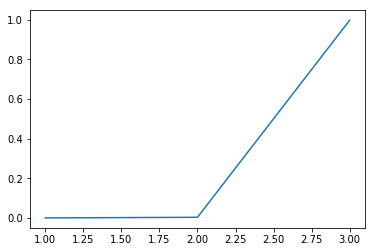

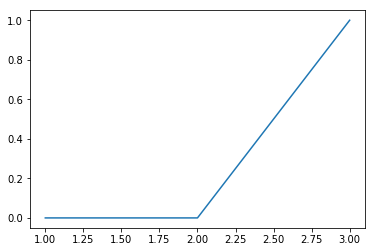

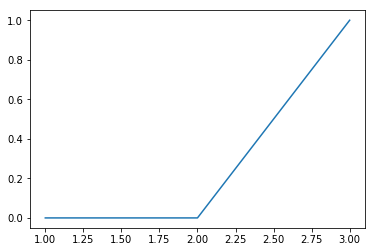

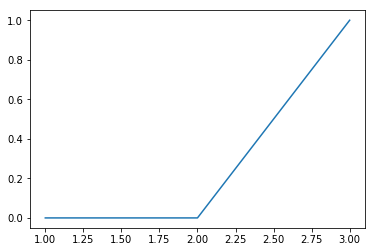

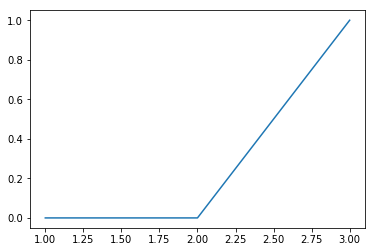

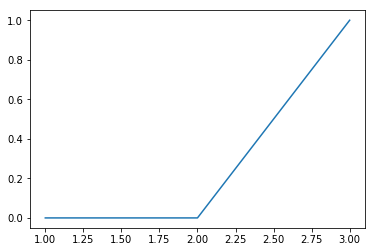

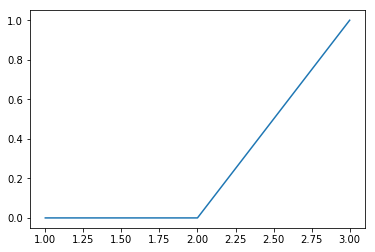

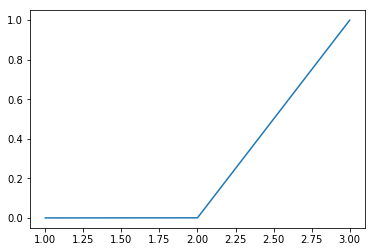

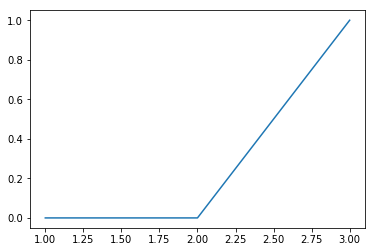

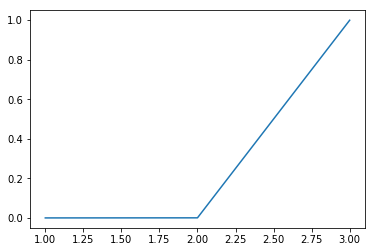

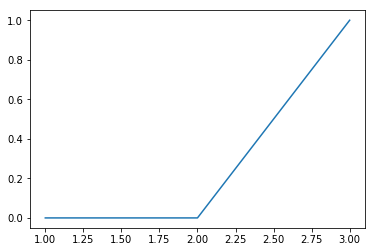

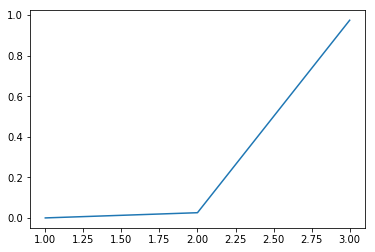

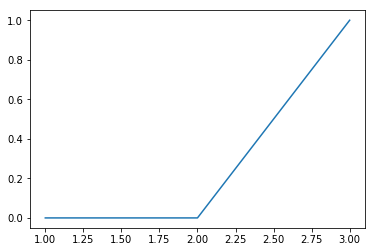

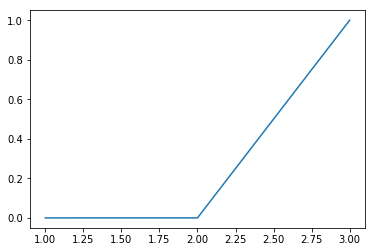

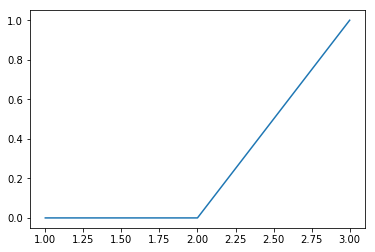

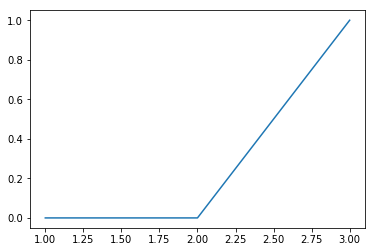

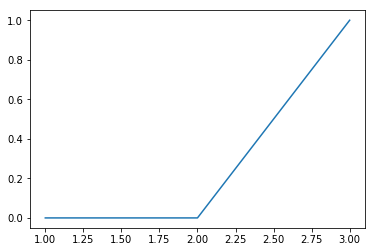

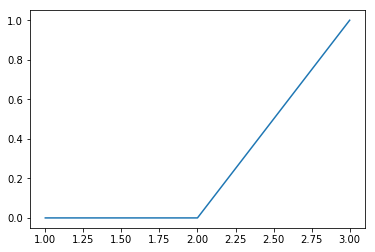

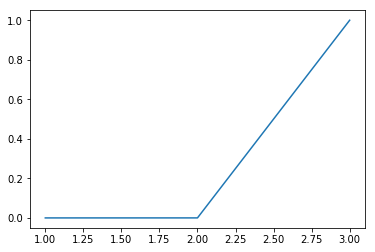

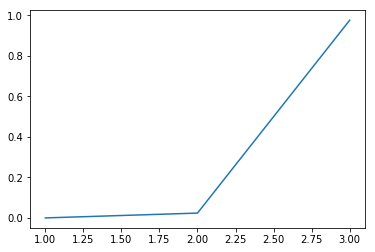

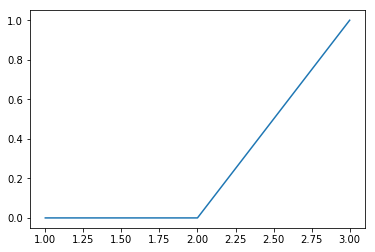

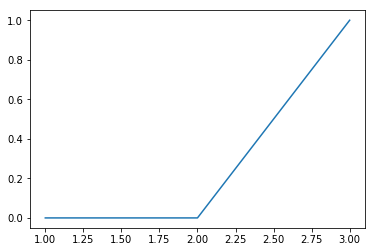

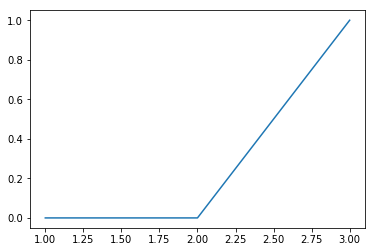

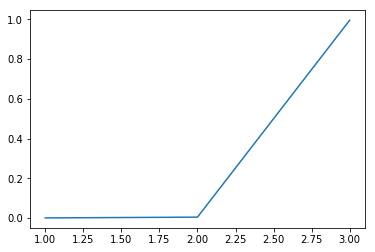

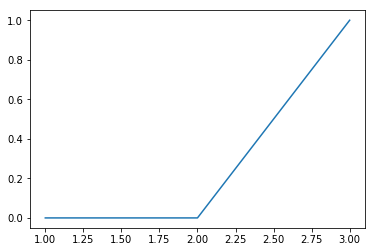

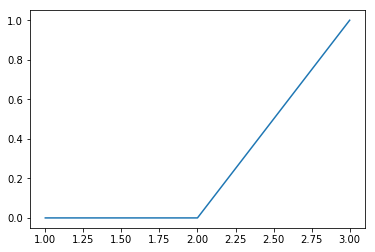

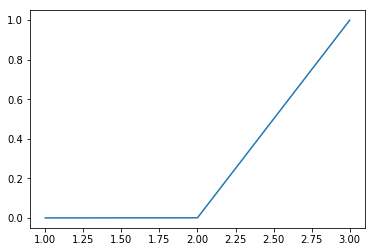

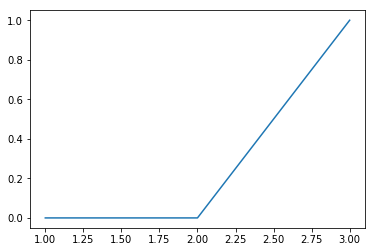

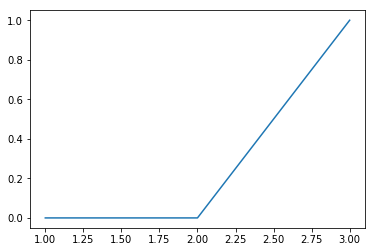

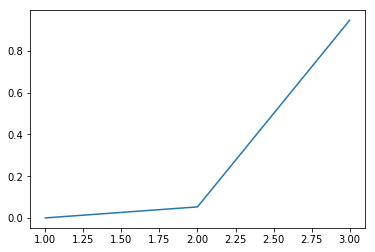

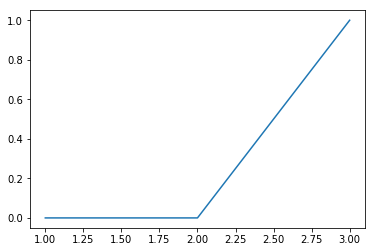

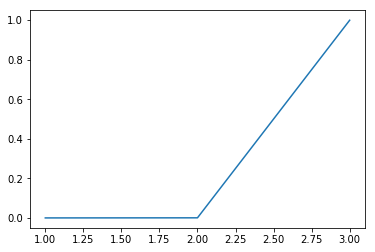

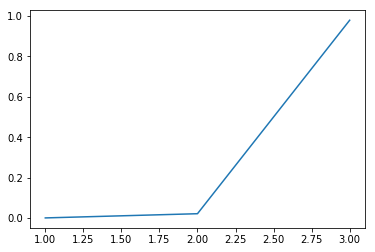

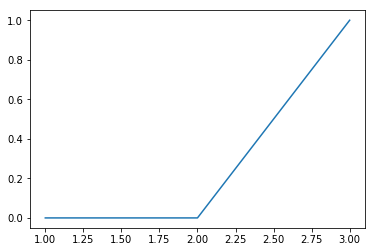

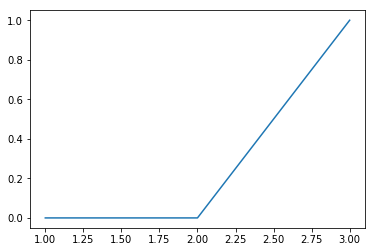

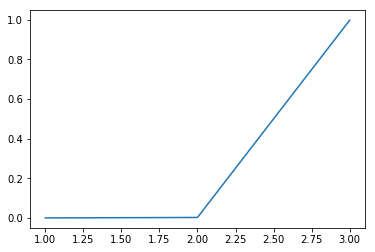

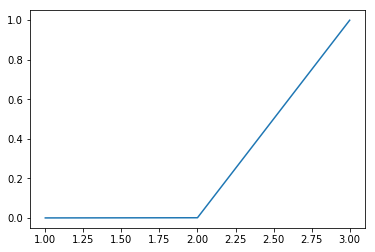

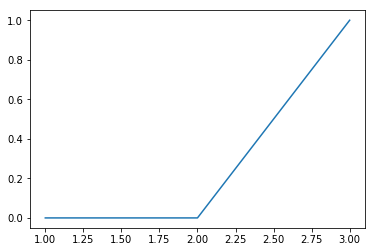

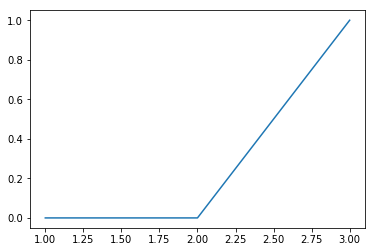

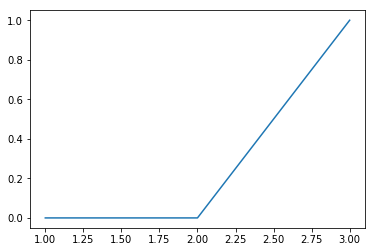

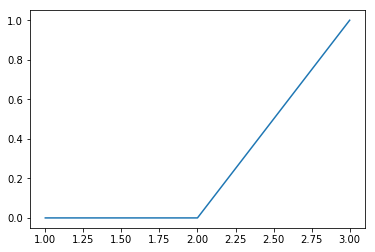

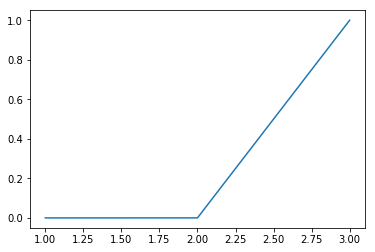

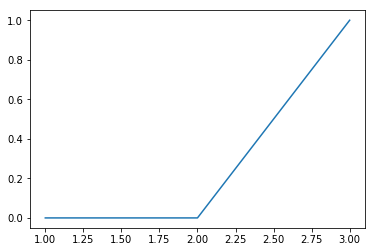

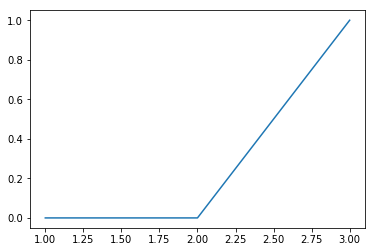

KeyboardInterrupt: 

In [140]:
for i in range(264):
    plt.figure()
    plt.plot([1, 2, 3], u[np.argsort(u[:, i])[-3:], i])
    plt.show()

In [143]:
10 / 3

3.3333333333333335

In [158]:
clust_dict = {}
for i in range(264):
    top_3 = u[np.argsort(u[:, i])[-3:], i]
    top_3_arg = np.argsort(u[:, i])[-3:]
    #print(top_3)
    for j in range(3):
        print(top_3[j])
        if top_3[j] > 0.01:
            print(top_3_arg[j])
            if top_3_arg[j] in clust_dict:
                    clust_dict[top_3_arg[j]].append(i)
            else:
                clust_dict[top_3_arg[j]] = [i]

8.272477911589875e-09
1.1187561165555292e-08
0.9999999805085545
8
1.4212712560977689e-10
0.0006511358433181167
0.99934886381667
7
9.600099204520227e-10
1.072110752380103e-08
0.9999999883187122
9
1.1815679889239632e-13
2.2340985127989095e-05
0.9999776590147529
6
1.9952024071331414e-14
5.91547446453618e-10
0.9999999994084268
7
1.5379486613300477e-11
2.356977103584982e-10
0.9999999997488234
9
7.848831650032982e-05
0.011363794244004152
6
0.9885561721801905
7
7.954843743318065e-16
3.5116121129745645e-11
0.999999999964883
6
5.108504301053323e-11
1.494632261785586e-06
0.9999985053165236
6
1.017796106310217e-06
2.8587151622913103e-06
0.9999960704592826
4
1.1612641526179128e-06
1.970942026594679e-05
0.9999788165468677
3
2.142222408292939e-09
0.0032328937269206297
0.9967671018621971
7
7.475127061031104e-13
9.979457749557851e-09
0.9999999900197943
6
7.862378421257124e-14
3.686846424830892e-12
0.9999999999961571
11
4.107751445421603e-08
0.0001876718017414126
0.9998122852926927
6
0.1744854702048081

In [159]:
clust_dict

{8: [0,
  17,
  21,
  26,
  43,
  44,
  54,
  75,
  76,
  99,
  102,
  108,
  109,
  114,
  115,
  124,
  127,
  133,
  151,
  156,
  160,
  172,
  174,
  178,
  186,
  189,
  196,
  199,
  200,
  205,
  206,
  224,
  226,
  227,
  246],
 7: [1,
  4,
  6,
  11,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  31,
  36,
  38,
  39,
  42,
  44,
  45,
  48,
  50,
  54,
  56,
  57,
  65,
  66,
  72,
  74,
  78,
  80,
  82,
  85,
  88,
  89,
  98,
  100,
  101,
  106,
  107,
  114,
  116,
  119,
  122,
  128,
  130,
  131,
  146,
  147,
  148,
  150,
  154,
  155,
  159,
  162,
  175,
  181,
  187,
  193,
  198,
  200,
  202,
  204,
  206,
  207,
  213,
  214,
  216,
  222,
  224,
  234,
  237,
  240,
  246,
  248,
  249,
  253,
  257,
  258,
  259,
  260],
 9: [2, 5, 30, 51, 87, 134, 163, 164, 166, 230, 251, 262],
 6: [3,
  6,
  7,
  8,
  12,
  14,
  15,
  19,
  25,
  27,
  28,
  29,
  32,
  35,
  36,
  37,
  41,
  46,
  47,
  53,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  64,
  67,
  68,
  69

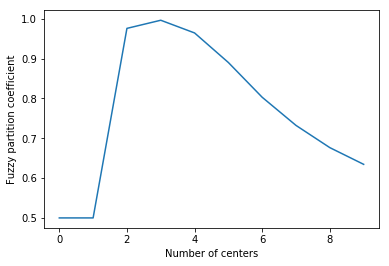

In [19]:
fpcs

[0.9211906973143509,
 0.837092943418234,
 0.7659506554784508,
 0.762634797088944,
 0.7232375701681333,
 0.6426951475802409,
 0.6071297442566553,
 0.5599912173984004,
 0.515231422863046,
 0.5200382985148255,
 0.5067155505090762,
 0.49018100092151845,
 0.49035086947460577,
 0.4656400298941668,
 0.46405671846625024,
 0.4605169409877603,
 0.47248795439954466,
 0.45248493258064293,
 0.45216231678239893,
 0.45942456268511966,
 0.4567134463115771,
 0.46722189566758465,
 0.45596169644044865,
 0.4329138320400104,
 0.4260186353307473,
 0.4374903438659167,
 0.4278075582817939,
 0.4307209827263889,
 0.43871813779338026,
 0.41613883982584077,
 0.4193894458627905,
 0.3953491488556837,
 0.3894832005664475,
 0.4205266721481137,
 0.4243868168401308,
 0.4129191638692984,
 0.39543035597295517,
 0.4380673054346207,
 0.41705273249409297,
 0.42226196706687813,
 0.4093009616464034,
 0.46808883766410364,
 0.4688475989583042,
 0.4259110931081272,
 0.43855385941710806,
 0.4280459562091617,
 0.43767790065540196,